In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

## Distribution des récidives réelles

Le score de récidive théorique

### Distribution globale

In [3]:
file_path = 'data/clean_data.csv' 
df = pd.read_csv(file_path)
column_names = df.columns.tolist()
column_names

['id',
 'name',
 'sex',
 'dob',
 'age',
 'age_cat',
 'race',
 'juv_fel_count',
 'decile_score',
 'juv_misd_count',
 'juv_other_count',
 'priors_count',
 'days_b_screening_arrest',
 'c_jail_in',
 'c_jail_out',
 'c_days_from_compas',
 'c_charge_degree',
 'c_charge_desc',
 'is_recid',
 'r_charge_degree',
 'r_days_from_arrest',
 'r_offense_date',
 'r_charge_desc',
 'r_jail_in',
 'is_violent_recid',
 'vr_charge_degree',
 'vr_offense_date',
 'vr_charge_desc',
 'score_text',
 'screening_date',
 'v_decile_score',
 'v_score_text',
 'priors_count.1',
 'event']

In [4]:
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'], format='%d/%m/%Y %H:%M', dayfirst=True)
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'], format='%d/%m/%Y %H:%M', dayfirst=True)
df['duration'] = abs((df['c_jail_out'] - df['c_jail_in']).dt.days) + 0.5
df['duration'] = df['duration'].fillna(0)
# df['duration'] = df['duration'].astype('int')
df = df[df['is_recid'] != -1]
df = df[df['c_charge_degree'] != '(X)']
df_glob = df.drop(['id', 'c_jail_in', 'c_jail_out', 'dob', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'days_b_screening_arrest', 'c_days_from_compas', 'c_charge_desc', 'r_offense_date', 'r_charge_desc', 'r_jail_in','vr_offense_date','vr_charge_desc','score_text','screening_date','v_decile_score','v_score_text','priors_count.1'], axis=1)
df_glob

,name,sex,age,age_cat,race,decile_score,priors_count,c_charge_degree,is_recid,r_charge_degree,r_days_from_arrest,is_violent_recid,vr_charge_degree,event,duration
0,miguel hernandez,Male,69,Greater than 45,Other,1,0,(F3),0,NaN,NaN,0,NaN,0,0.5
1,miguel hernandez,Male,69,Greater than 45,Other,1,0,(F3),0,NaN,NaN,0,NaN,0,0.5
3,kevon dixon,Male,34,25 - 45,African-American,3,0,(F3),1,(F3),NaN,1,(F3),1,10.5
4,ed philo,Male,24,Less than 25,African-American,4,4,(F3),1,(M1),0.0,0,NaN,0,1.5
5,ed philo,Male,24,Less than 25,African-American,4,4,(F3),1,(M1),0.0,0,NaN,0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,malcolm simmons,Male,23,Less than 25,African-American,3,0,(F3),0,NaN,NaN,0,NaN,0,1.5
15509,alexsandra beauchamps,Female,31,25 - 45,African-American,6,5,(M1),0,NaN,NaN,0,NaN,0,10.5
15510,winston gregory,Male,57,Greater than 45,Other,1,0,(F2),0,NaN,NaN,0,NaN,0,1.5
15511,farrah jean,Female,33,25 - 45,African-American,2,3,(M1),0,NaN,NaN,0,NaN,0,1.5


In [5]:
# One-hot encoding using pandas
sex_encoded = pd.get_dummies(df['sex'], prefix='sex')
age_encoded = pd.get_dummies(df['age_cat'], prefix='age')
race_encoded = pd.get_dummies(df['race'], prefix='race')
c_degree_encoded = pd.get_dummies(df['c_charge_degree'], prefix='c_degree')
r_degree_encoded = pd.get_dummies(df['r_charge_degree'], prefix='r_degree')
vr_degree_encoded = pd.get_dummies(df['vr_charge_degree'], prefix='vr_degree')

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df_glob, sex_encoded, age_encoded, race_encoded, c_degree_encoded, r_degree_encoded, vr_degree_encoded], axis=1)
df_encoded = df_encoded.drop(['name', 'sex', 'age_cat', 'race', 'c_charge_degree', 'r_charge_degree', 'vr_charge_degree'], axis=1)
df_encoded

,age,decile_score,priors_count,is_recid,r_days_from_arrest,is_violent_recid,event,duration,sex_Female,sex_Male,...,r_degree_(MO3),vr_degree_(F1),vr_degree_(F2),vr_degree_(F3),vr_degree_(F5),vr_degree_(F6),vr_degree_(F7),vr_degree_(M1),vr_degree_(M2),vr_degree_(MO3)
0,69,1,0,0,NaN,0,0,0.5,False,True,...,False,False,False,False,False,False,False,False,False,False
1,69,1,0,0,NaN,0,0,0.5,False,True,...,False,False,False,False,False,False,False,False,False,False
3,34,3,0,1,NaN,1,1,10.5,False,True,...,False,False,False,True,False,False,False,False,False,False
4,24,4,4,1,0.0,0,0,1.5,False,True,...,False,False,False,False,False,False,False,False,False,False
5,24,4,4,1,0.0,0,0,1.5,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,23,3,0,0,NaN,0,0,1.5,False,True,...,False,False,False,False,False,False,False,False,False,False
15509,31,6,5,0,NaN,0,0,10.5,True,False,...,False,False,False,False,False,False,False,False,False,False
15510,57,1,0,0,NaN,0,0,1.5,False,True,...,False,False,False,False,False,False,False,False,False,False
15511,33,2,3,0,NaN,0,0,1.5,True,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df_num_encoded = df_glob.drop(['name'], axis=1)
label_encoder = LabelEncoder()
df_num_encoded['sex'] = label_encoder.fit_transform(df['sex'])
df_num_encoded['age_cat'] = label_encoder.fit_transform(df['age_cat'])
df_num_encoded['race'] = label_encoder.fit_transform(df['race'])
df_num_encoded['c_charge_degree'] = label_encoder.fit_transform(df['c_charge_degree'])
df_num_encoded['r_charge_degree'] = label_encoder.fit_transform(df['r_charge_degree'])
df_num_encoded['vr_charge_degree'] = label_encoder.fit_transform(df['vr_charge_degree'])
df_num_encoded

,sex,age,age_cat,race,decile_score,priors_count,c_charge_degree,is_recid,r_charge_degree,r_days_from_arrest,is_violent_recid,vr_charge_degree,event,duration
0,1,69,1,5,1,0,4,0,10,NaN,0,9,0,0.5
1,1,69,1,5,1,0,4,0,10,NaN,0,9,0,0.5
3,1,34,0,0,3,0,4,1,3,NaN,1,2,1,10.5
4,1,24,2,0,4,4,4,1,7,0.0,0,9,0,1.5
5,1,24,2,0,4,4,4,1,7,0.0,0,9,0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,1,23,2,0,3,0,4,0,10,NaN,0,9,0,1.5
15509,0,31,0,0,6,5,8,0,10,NaN,0,9,0,10.5
15510,1,57,1,5,1,0,3,0,10,NaN,0,9,0,1.5
15511,0,33,0,0,2,3,8,0,10,NaN,0,9,0,1.5


In [7]:
def plot_correlation_matrix(df):
    """
    Plots a correlation matrix using Matplotlib.
    
    Args:
    df (pandas DataFrame): The DataFrame for which the correlation matrix will be plotted.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create heatmap with hover tooltips using Plotly Express
    fig = px.imshow(corr_matrix,
                    labels=dict(x="Features", y="Features", color="Correlation"),
                    x=corr_matrix.index,
                    y=corr_matrix.columns,
                    color_continuous_scale='Viridis')

    # Update hover template
    fig.update_traces(hovertemplate='Feature 1: %{y}<br>Feature 2: %{x}<br>Correlation: %{z}<extra></extra>')

    # Set layout
    fig.update_layout(title='Correlation Matrix')

    # Show plot
    fig.show()

plot_correlation_matrix(df_encoded)

In [8]:
df_noNan = df_encoded.dropna()
plot_correlation_matrix(df_noNan)

In [9]:
plot_correlation_matrix(df_num_encoded)

# Recidivism analysis

Something was unclear about the dataset, and it was which column was predicted by the COMPAS algorithm. 
Indeed, there is 3 columns which could indicate recidivism : is_recid, is_violent_recid and event. 
is_recid and is_violent recid seemed factual informations recolted 2 years after the COMPAS screening, because we get additional information about the recidivism. 
Another mystery was if those 2 columns where totally independant or not, meaning there could be violent recidivism without classic recidivism. To determine that, we created another column, which was true if either or both of those columns were true.

In [19]:
df_glob['recidivism'] = df['is_recid'] | df['is_violent_recid']
df_glob

,name,sex,age,age_cat,race,decile_score,priors_count,c_charge_degree,is_recid,r_charge_degree,r_days_from_arrest,is_violent_recid,vr_charge_degree,event,duration,age_group,duration_cat,recidivism
0,miguel hernandez,Male,69,Greater than 45,Other,1,0,(F3),0,NaN,NaN,0,NaN,0,0.5,61-80,0.5,0
1,miguel hernandez,Male,69,Greater than 45,Other,1,0,(F3),0,NaN,NaN,0,NaN,0,0.5,61-80,0.5,0
3,kevon dixon,Male,34,25 - 45,African-American,3,0,(F3),1,(F3),NaN,1,(F3),1,10.5,21-40,11-100,1
4,ed philo,Male,24,Less than 25,African-American,4,4,(F3),1,(M1),0.0,0,NaN,0,1.5,21-40,1-10,1
5,ed philo,Male,24,Less than 25,African-American,4,4,(F3),1,(M1),0.0,0,NaN,0,1.5,21-40,1-10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,malcolm simmons,Male,23,Less than 25,African-American,3,0,(F3),0,NaN,NaN,0,NaN,0,1.5,21-40,1-10,0
15509,alexsandra beauchamps,Female,31,25 - 45,African-American,6,5,(M1),0,NaN,NaN,0,NaN,0,10.5,21-40,11-100,0
15510,winston gregory,Male,57,Greater than 45,Other,1,0,(F2),0,NaN,NaN,0,NaN,0,1.5,41-60,1-10,0
15511,farrah jean,Female,33,25 - 45,African-American,2,3,(M1),0,NaN,NaN,0,NaN,0,1.5,21-40,1-10,0


<Axes: >

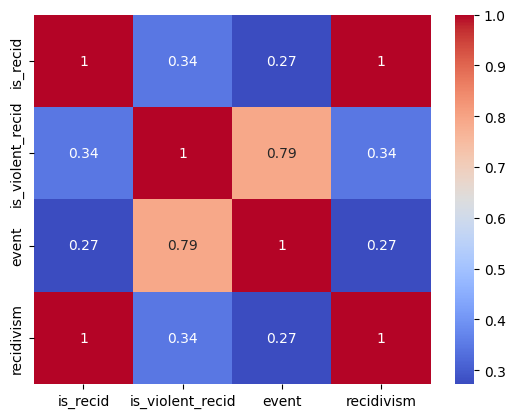

In [20]:
df_recid = df_glob.loc[:, ['is_recid', 'is_violent_recid', 'event', 'recidivism']]
df_corr = df_recid.corr()

sns.heatmap(df_corr, annot=True, cmap='coolwarm')

After observing the correlation matrix of those 4 parameters, we can see that recidivism and is_recid are totally correlated, meaning there is no case of violent recidivism without classic recidivism. We can also observe there is violence in recidivism in 34% of the cases. 

The real mystery is the event column. It is not really correlated with is_recid, but is highly correlated with violent recidivism.

Hypothesis : event could be the outcome predicted by the COMPAS algorithm, meaning it was really bad at predicting simple recidivism, but worked for more severe case ?

We need to compare it with the decile score, which was calculated by the COMPAS algorithm (verification needed)